<a href="https://colab.research.google.com/github/chavezgranados/Machine-Learning/blob/main/s3/sesion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="gotham" color="purple"> **MACHINE LEARNING IN ECONOMICS 2025: SESIÓN 3**</font>


`Luis Chávez`

![texto del vínculo](https://dais.chbe.ubc.ca/assets/thumbnails/neural.png)

# <font face="gotham" color="purple"> **1. Random Forest**</font>

## <font face="gotham" color="purple"> **1.1 Definición**</font>

**Random forest** es un algoritmo de lenguaje supervisado (no paramétrico), basado en la combinación de múltiples árboles de decisión. Trata de generar muchos árboles de decisión (de ahí el nombre "forest") y luego combinar sus predicciones para mejorar la precisión y reducir el sobreajuste.


**Ventajas**:

*   Clasificación: diagnóstico médico, detección de fraudes, reconocimiento de imágenes, entre otros.
*   Regresión: predicción de precios de viviendas, pronósticos financieros.
*   Selección de características: selección de variables importamtes para predicción.
*   Detección de anomalías: identificación de valores atípicos en datos financieros o de sensores.


**Desventajas**:

*   La combinación de múltiples árboles reduce la capacidad de interpretación en comparación con modelos basados en un solo árbol.
*   No es capaz de extrapolar fuera del rango observado en los datos de entrenamiento.
</font>

## <font face="gotham" color="purple"> **1.2 Implementabilidad**</font>



*   Scikit-learn
*   Gradient Boosting



## <font face="gotham" color="purple"> **1.3 Sesgo y varianza**</font>

Los métodos de *ensemple* permiten ajustar la dicotomía.

*   Bagging (bootstrap aggregation) -> opera de form indeppendiente y paralela.
*   Boosting -> opera de forma secuencial


## <font face="gotham" color="purple"> **1.4 Ejemplo inicial**</font>

Dado:

| id  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|-----|----|----|----|----|----|----|----|----|----|----|
| Y   | 10 | 18 | 24 |  8 |  2 |  9 | 16 | 10 | 20 | 14 |
| X   | ...| ...| ...| ...| ...| ...| ...| ...| ...| ...|

Algoritmo de prediciones:
![texto del vínculo](https://cienciadedatos.net/images/diagrama_prediccion_rf.png)

*Fuente: cienciadedatos.net*

Las prediccción para el primer árbol es:
$$\hat{y}_1=\dfrac{24+2+20}{3}=15.3$$
y así sucesivamente...

In [116]:
# Con códigos
import pandas as pd
y_1=(24+2+20)/3
y_1

15.333333333333334

In [117]:
y_2=(18+24)/2
y_2

21.0

In [118]:
y_3=(18+24+2+20)/4
y_3

16.0

In [119]:
# Predicción de la muestra
y_pred=(y_1+y_2+y_3)/3
y_pred

17.444444444444446

In [120]:
# Media de la muestra:
data = {'id': [1,2,3,4,5,6,7,8,9,10],
        'Y': [10, 18, 24, 8, 2, 9, 16, 10, 20, 14]}
df = pd.DataFrame(data)
media_Y = df['Y'].mean()
print("Media de Y:", media_Y)

Media de Y: 13.1


# <font face="gotham" color="purple"> **2. Aplicación en Regresión**</font>

## <font face="gotham" color="purple"> **2.1 Seteo**</font>

In [121]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 8

# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count

# Versión sklearn
# ==============================================================================
print('Versión sklearn:', sklearn.__version__)

Versión sklearn: 1.6.1


In [122]:
data1=pd.read_stata("endes23.dta")
data1.head(2)

,HC1,HC2,HC3,HC27,HC53,HC57,HV271
0,54.0,161.0,1007.0,Mujer,126.0,Sin anemia,0.665484
1,55.0,223.0,1072.0,Mujer,141.0,Sin anemia,0.789448


In [123]:
new_names = {
    'HC1': 'edad_meses',
    'HC2': 'peso_kg',
    'HC3': 'altura_cm',
    'HC27': 'sexo',
    'HC53': 'hemog',
    'HC57': 'niv_anemia',
    'HV271': 'ind_pob'
}
data2 = data1.rename(columns=new_names)
data2.head(2)

,edad_meses,peso_kg,altura_cm,sexo,hemog,niv_anemia,ind_pob
0,54.0,161.0,1007.0,Mujer,126.0,Sin anemia,0.665484
1,55.0,223.0,1072.0,Mujer,141.0,Sin anemia,0.789448


In [124]:
# Missing
# ==============================================================================
display(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23935 entries, 0 to 23934
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   edad_meses  23935 non-null  float64 
 1   peso_kg     23935 non-null  float64 
 2   altura_cm   23935 non-null  float64 
 3   sexo        23935 non-null  category
 4   hemog       23935 non-null  float64 
 5   niv_anemia  23935 non-null  category
 6   ind_pob     23935 non-null  float64 
dtypes: category(2), float64(5)
memory usage: 982.2 KB


None

In [125]:
# Destring
# ==============================================================================
data2['sexo'] = data2['sexo'].astype('category').cat.codes
data2['niv_anemia'] = data2['niv_anemia'].astype('category').cat.codes
display(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23935 entries, 0 to 23934
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   edad_meses  23935 non-null  float64
 1   peso_kg     23935 non-null  float64
 2   altura_cm   23935 non-null  float64
 3   sexo        23935 non-null  int8   
 4   hemog       23935 non-null  float64
 5   niv_anemia  23935 non-null  int8   
 6   ind_pob     23935 non-null  float64
dtypes: float64(5), int8(2)
memory usage: 981.8 KB


None

In [126]:
# Regresión típica para iniciar
# ==============================================================================
import statsmodels.api as sm
X_0 = data2[['edad_meses', 'sexo', 'niv_anemia','peso_kg','ind_pob','hemog']]
X_0 = sm.add_constant(X_0) #intercepto
Y_0= data2['altura_cm']

In [127]:
OLS = sm.OLS(Y_0, X_0).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              altura_cm   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 7.973e+04
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:52:01   Log-Likelihood:            -1.1267e+05
No. Observations:               23935   AIC:                         2.254e+05
Df Residuals:                   23928   BIC:                         2.254e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.1198      1.646    346.958      0.0

<ipython-input-147-fe831eaca7a2>:12: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle="--", alpha=0.5)


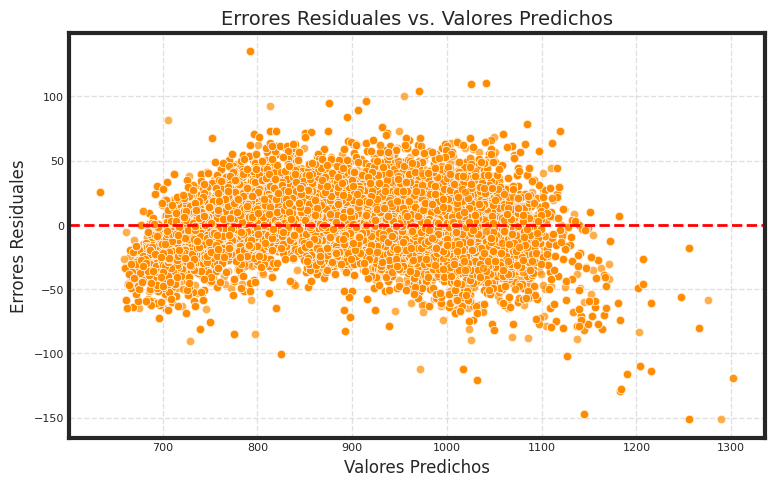

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

Y_hat= OLS.predict(X_0)
residuos = Y_0 - Y_hat
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_hat, y=residuos, color="darkorange", alpha=0.7)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
# Etiquetas y título
plt.xlabel("Valores Predichos", fontsize=12)
plt.ylabel("Errores Residuales", fontsize=12)
plt.grid(False, linestyle="--", alpha=0.5)
plt.title("Errores Residuales vs. Valores Predichos", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

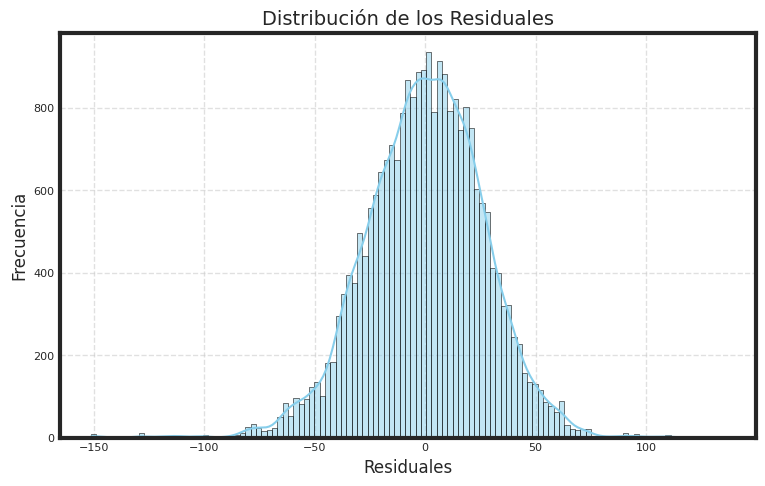

In [149]:
# Gráfico de distribución de residuos
# ==============================================================================
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Residuales", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de los Residuales", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

In [150]:
# División: entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        data2.drop(columns="altura_cm"),
                                        data2['altura_cm'],
                                        test_size = 0.25,
                                        random_state = 123
                                    )
print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]}")
print(f"Tamaño conjunto test: {X_test.shape[0]}")

# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10, # nro de árboles
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

Tamaño conjunto entrenamiento: 17951
Tamaño conjunto test: 5984


RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

## <font face="gotham" color="purple"> **2.2 Predicción**</font>

In [151]:
# Error de test del modelo inicial
# ==============================================================================
from sklearn.metrics import mean_squared_error, r2_score
predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")
r2 = r2_score(y_test, predicciones)
print(f'R-squared: {r2}')

El error (rmse) de test es: 9.631570002266304
R-squared: 0.9939072262891941


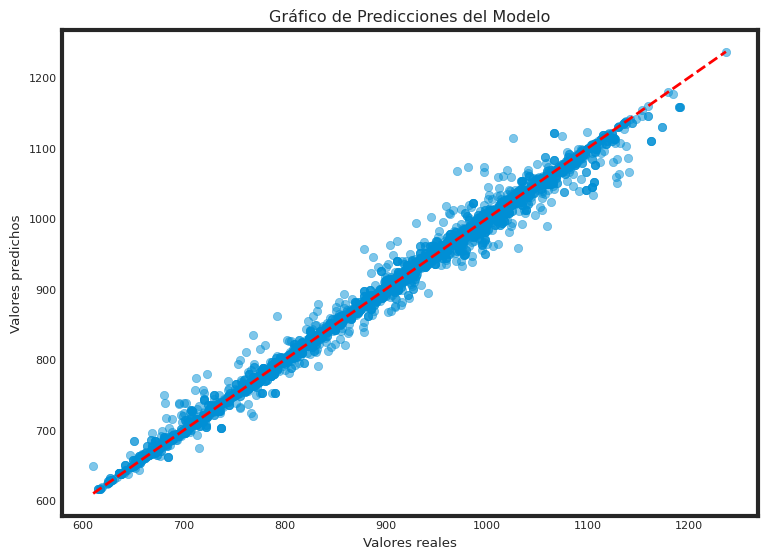

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Gráfico de Predicciones del Modelo")

# Agregar la línea de identidad (para visualizar la perfección del modelo)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()

**Número de árboles:**

Valor óptimo de n_estimators: 141


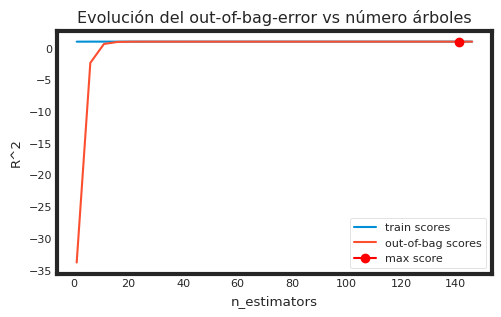

In [164]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
warnings.filterwarnings('ignore')
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
warnings.filterwarnings('default')

Valor óptimo de n_estimators: 146


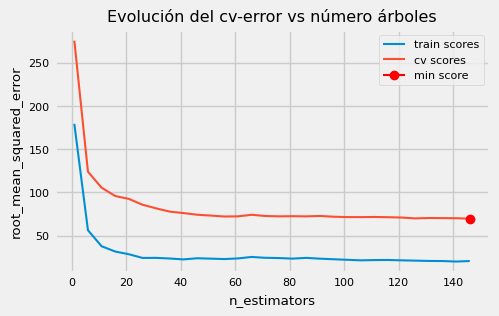

In [58]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:

    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )

    # Error de entrenamiento
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X=X_train)
    rmse = root_mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")